In [13]:
%load_ext autoreload
%autoreload
%matplotlib inline
import gym
import numpy as np
import matplotlib.pyplot as plt

from tabular import (
    train_with_plots,
    dyna_q,
    sarsa_lambda,
    q_learning
)

from math_utils import (
    exp_decay,
    harmonic_sequence,
    softmax_policy
)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
alpha = harmonic_sequence(2e-2, 1e-3, 1e-5)
temp = exp_decay(0.5, 0.01, 1e-5)
gamma = 1.0
policy = softmax_policy(temp)

q_learning_episode_fn = q_learning(policy, gamma, alpha)

sarsa_episode_fn = sarsa_lambda(policy, gamma, alpha, 0.0)

lambda_ = 0.5
sarsa_lambda_episode_fn = sarsa_lambda(policy, gamma, alpha, lambda_)

n_planning = 10
dyna_q_episode_fn = dyna_q(policy, gamma, alpha, n_planning)

def initialisation(x):
    def f(state_size, action_size):
        Q = x * np.ones((state_size, action_size), np.float64)
        return Q,

    return f

def dyna_q_initialisation(x):
    def f(state_size, action_size):
        Q = x * np.ones((state_size, action_size), np.float64)
        R = x * np.ones((state_size, action_size, state_size), np.float64)
        T = np.zeros((state_size, action_size, state_size), np.float64)
        return Q, R, T
    
    return f

def episode_runner(env_name, max_eps, avg_window, reward_lim):
    def f(fig, episode_fn, initialisation_fn):
        env = gym.make(env_name)

        state_size = env.observation_space.n
        action_size = env.action_space.n

        init = initialisation_fn(state_size, action_size)

        returns, tracks = train_with_plots(fig, env, episode_fn, max_eps, 
                                           avg_window, reward_lim, 
                                           *init)
    
        return returns, tracks
    return f

cliff_walking = episode_runner('CliffWalking-v0', int(1e4), 100, [-250, 0])
frozen_lake = episode_runner('FrozenLake-v0', int(2e4), 500, [0, 1])

def figure():
    return plt.figure(figsize=(12, 4))


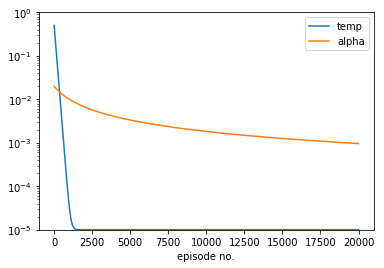

In [15]:
x = np.arange(int(2e4))
plt.yscale('log')
plt.ylim([1e-5, 1])
plt.xlabel('episode no.')
plt.plot(x, np.vectorize(temp)(x), label='temp')
plt.plot(x, np.vectorize(alpha)(x), label='alpha')
plt.legend();


## Q-learning

10000: -13.025

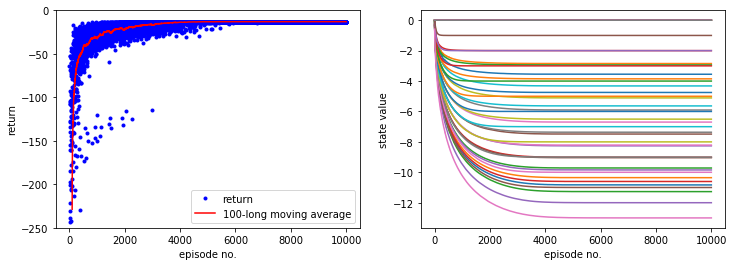

In [16]:
cliff_walking(figure(), q_learning_episode_fn, initialisation(0));

20000: 0.714

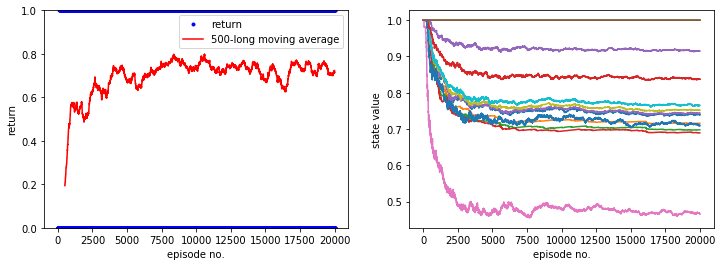

In [17]:
frozen_lake(figure(), q_learning_episode_fn, initialisation(1));

## sarsa

10000: -13.025

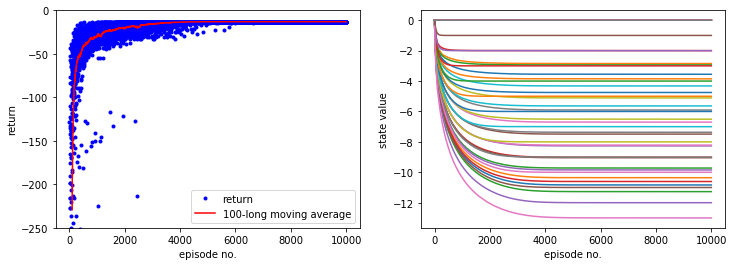

In [18]:
cliff_walking(figure(), sarsa_episode_fn, initialisation(0));

20000: 0.712

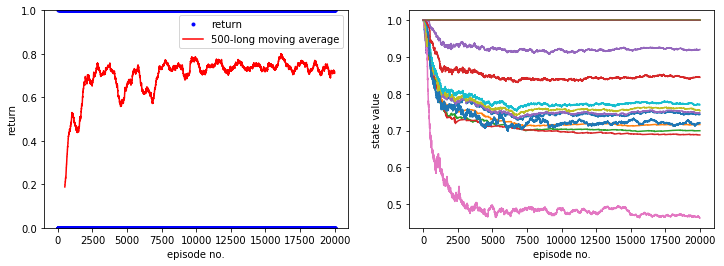

In [19]:
frozen_lake(figure(), sarsa_episode_fn, initialisation(1));

## sarsa lambda 

10000: -13.021

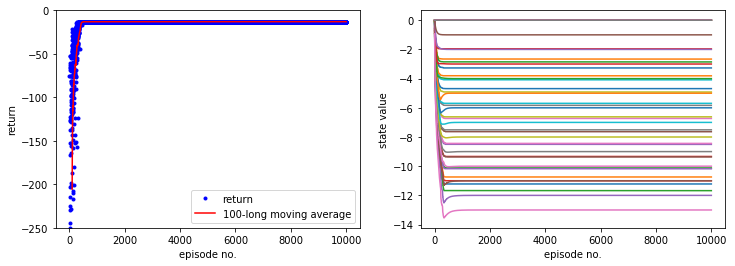

In [20]:
cliff_walking(figure(), sarsa_lambda_episode_fn, initialisation(0));

20000: 0.734

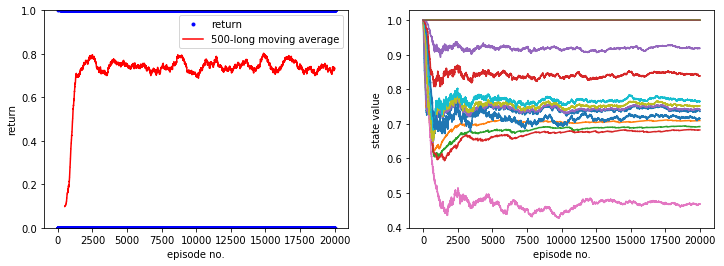

In [21]:
frozen_lake(figure(), sarsa_lambda_episode_fn, initialisation(1));

## dyna-q

10000: -13.02

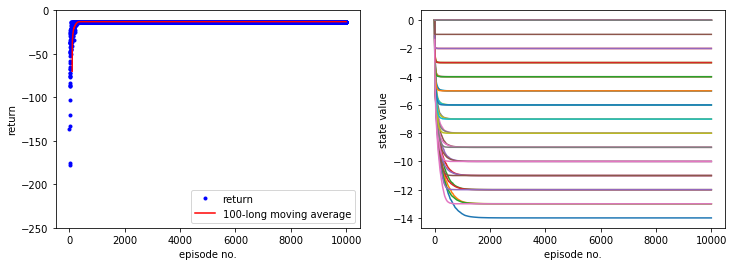

In [22]:
cliff_walking(figure(), dyna_q_episode_fn, dyna_q_initialisation(0));

20000: 0.708

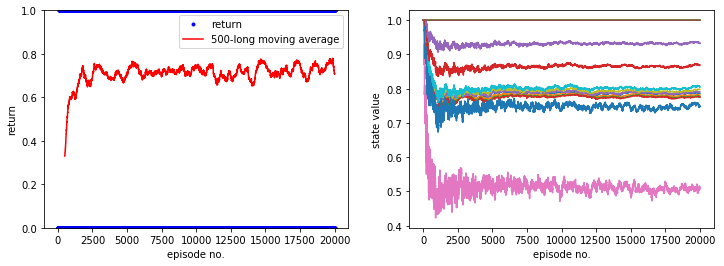

In [23]:
frozen_lake(figure(), dyna_q_episode_fn, dyna_q_initialisation(1));